In [1]:
from scipy.spatial import distance
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from scipy.stats import chi2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('consolidate.csv', index_col=0, encoding='big5')

In [3]:
new_df = df[~((df['時間']=='09:00:00') | (df['時間']=='13:15:00'))]
new_df.index=range(len(new_df))

In [4]:
array = new_df.drop(columns=['日期', '時間'])

In [5]:
array.drop(columns=[x for x in list(array.columns) if 'vwap' in x], inplace=True)

In [6]:
array.shape

(1600, 30)

In [7]:
endDate = 1424
trainArray = array[0:endDate]
testArray = array[endDate:]
dfTrain = new_df.iloc[0:endDate]
dfTest = new_df.iloc[endDate:]

# Degree of freedom

In [8]:
corr = trainArray[[i for i in array.columns if 'close' in i]].corr()

In [9]:
trainArray.shape

(1424, 30)

In [10]:
corr.shape

(15, 15)

In [11]:
count = 0
for i in corr.values:
    for j in i:
        if j>0.80:
            count+=1

In [12]:
corr.shape[0]

15

In [13]:
dfreedom = trainArray.shape[1]-(count-corr.shape[0])/2

In [14]:
dfreedom

21.0

In [15]:
trainArray=trainArray.values

In [16]:
trainArray.shape

(1424, 30)

# Dataset Split

# Standarization

In [17]:
stdScaler = StandardScaler()

In [18]:
stdScaler.fit(trainArray)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
stdTrainArray = stdScaler.transform(trainArray)

In [20]:
stdTestArray = stdScaler.transform(array)

In [21]:
muTrain = stdTrainArray.mean(axis=0)

In [22]:
featureNum = stdTrainArray.shape[1]

# Mahalanobis

In [23]:
cov = np.cov(stdTrainArray.T)

In [24]:
cov.shape

(30, 30)

In [25]:
covInverse = np.linalg.inv(cov)

In [26]:
mDisList = []
for i in range(stdTrainArray.shape[0]):
    mDistance = distance.mahalanobis(muTrain, stdTrainArray[i], covInverse)
    mDisList.append(mDistance)

In [27]:
mDisListSquare = np.square(mDisList)

# Threshold

In [28]:
alpha = 0.01

In [29]:
kSquare = chi2.ppf(1-alpha, dfreedom)

In [30]:
chi2.cdf(kSquare, dfreedom)

0.99

In [31]:
k = np.sqrt(kSquare)

# Predict

In [32]:
mPredictList = []
for i in range(stdTestArray.shape[0]):
    testMDistance = distance.mahalanobis(muTrain, stdTestArray[i], covInverse)
    mPredictList.append(testMDistance)

In [33]:
mPredictListSquare = np.square(mPredictList)

In [34]:
dfTrain['MDistance']=mDisList

/usr/lib/python3.6/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
new_df['MDistance']=mPredictList

/usr/lib/python3.6/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
dfTrain[dfTrain['MDistance'] > k]['日期'].shape

(245,)

In [37]:
new_df[new_df['MDistance'] > k][['日期','時間']].shape

(369, 2)

In [38]:
new_df['日期'].shape

(1600,)

In [39]:
new_df[new_df['MDistance'] > k].tail(50)

,日期,時間,統一_close,統一_vol,vwap_x,台塑_close,台塑_vol,vwap_y,台化_close,台化_vol,...,台塑化_close,台塑化_vol,vwap_x.6,南亞_close,南亞_vol,vwap_y.6,台積電_close,台積電_vol,vwap,MDistance
1550,2019/9/11,12:45:00,76.6,138,10580.000000,95.2,285,27160.500000,88.4,70,...,96.3,62,5972.666667,69.4,79,5485.233333,261.5,972,254178.000000,7.186036
1551,2019/9/11,13:00:00,76.4,648,49572.000000,94.8,607,57624.533333,88.4,390,...,96.1,542,52140.400000,69.2,785,54348.166667,261.0,3424,894234.666667,8.864203
1552,2019/9/12,09:15:00,77.6,553,42857.500000,96.3,419,40335.733333,89.3,608,...,97.2,161,15622.366667,70.0,422,29540.000000,263.0,2775,730750.000000,8.696185
1553,2019/9/12,09:30:00,77.4,368,28520.000000,96.2,270,25992.000000,89.1,595,...,97.0,187,18163.933333,70.0,516,36154.400000,262.5,2162,567885.333333,7.091645
1554,2019/9/12,09:45:00,77.1,256,19763.200000,96.3,90,8664.000000,89.1,127,...,96.7,141,13653.500000,70.0,225,15757.500000,262.5,1221,320716.000000,7.372638
1555,2019/9/12,10:00:00,76.8,383,29465.466667,96.2,64,6158.933333,88.9,296,...,96.6,67,6474.433333,69.8,346,24185.400000,262.0,996,261118.000000,6.691543
1556,2019/9/12,10:15:00,76.7,239,18331.300000,96.2,453,43608.800000,88.8,193,...,96.5,194,18733.933333,69.5,218,15172.800000,262.0,1579,413698.000000,7.022248
1557,2019/9/12,10:30:00,77.2,318,24486.000000,96.2,150,14435.000000,89.2,462,...,96.6,447,43075.900000,69.7,540,37602.000000,262.0,624,163488.000000,7.395571
1558,2019/9/12,10:45:00,77.3,257,19840.400000,96.3,214,20608.200000,89.3,297,...,96.7,139,13432.033333,69.7,396,27601.200000,262.0,1270,332740.000000,7.860854
1559,2019/9/12,11:00:00,77.3,208,16078.400000,96.4,164,15804.133333,89.4,170,...,96.9,194,18792.133333,69.7,468,32619.600000,262.0,1173,307326.000000,9.320970


# Model check

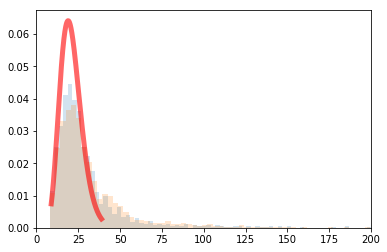

In [40]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim([0, 200])
x = np.linspace(chi2.ppf(0.01, dfreedom), chi2.ppf(0.99, dfreedom), 1000)
ax.plot(x, chi2.pdf(x, dfreedom), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
ax.hist(mDisListSquare, density=True, histtype='stepfilled', alpha=0.2, bins='auto')
ax.hist(mPredictListSquare, density=True, histtype='stepfilled', alpha=0.2, bins='auto')
plt.show()

In [41]:
new_df['outlier'] = new_df['MDistance'] > k

/usr/lib/python3.6/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
new_df[['日期','時間','outlier']].to_csv('result/md.csv')